In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataframe.csv')
df_all_timestamps = pd.read_csv('dataframe_all_timestamps.csv')

In [3]:
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 23 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [5]:
see_dates = df[["publish_date"]]
print(see_dates)

       publish_date
0        2017-11-12
1        2017-11-12
2        2017-11-12
3        2017-11-13
4        2017-11-13
...             ...
171144   2018-06-13
171145   2018-06-13
171146   2018-06-13
171147   2018-06-13
171148   2018-05-17

[171149 rows x 1 columns]


In [4]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 19 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

In [51]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR


In [52]:
df_all_timestamps.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR
2,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR
3,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR
4,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR


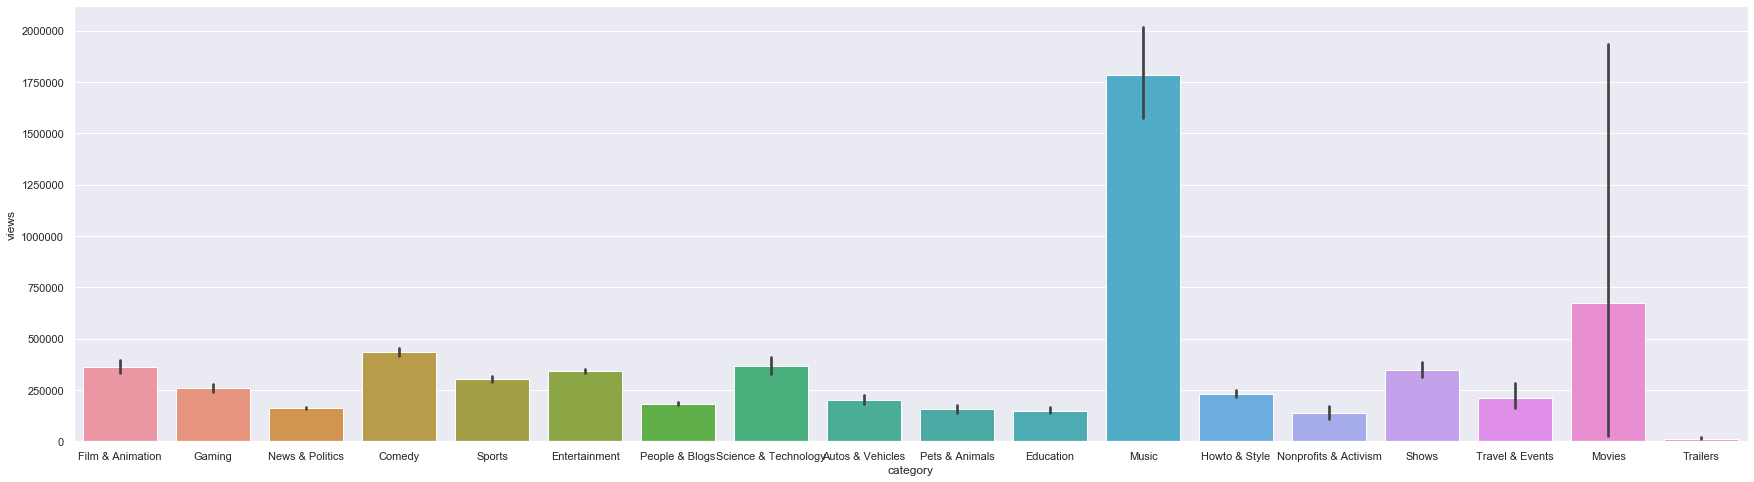

In [19]:
sns.set(rc={'figure.figsize':(30,8)})
ax = sns.barplot(x="category", y="views", data=df)

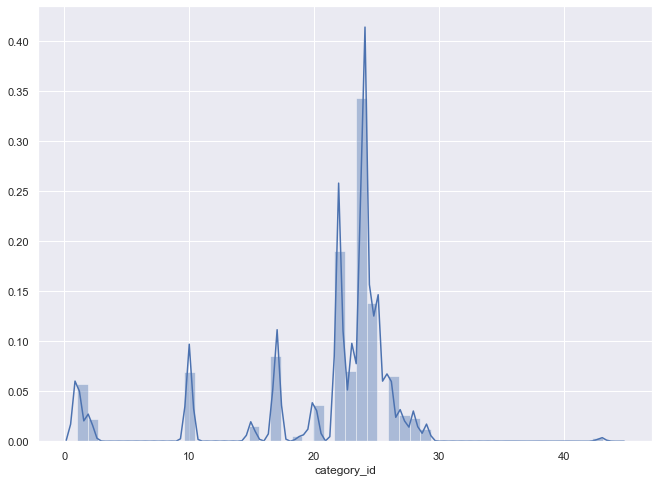

In [31]:
sns.distplot(df['category_id'])

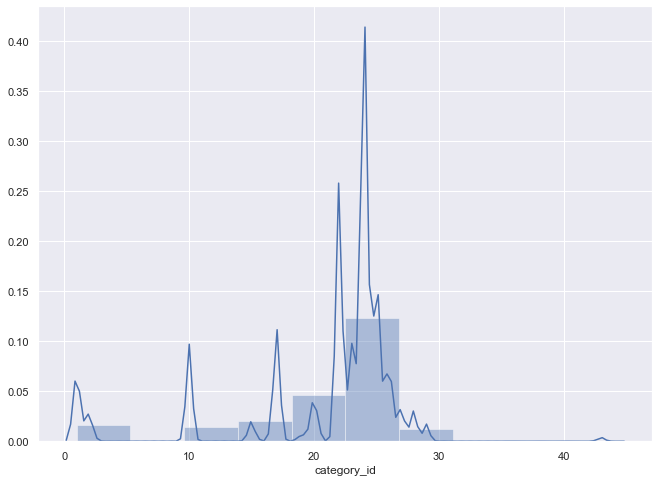

In [33]:
sns.distplot(df['category_id'], bins = 10)

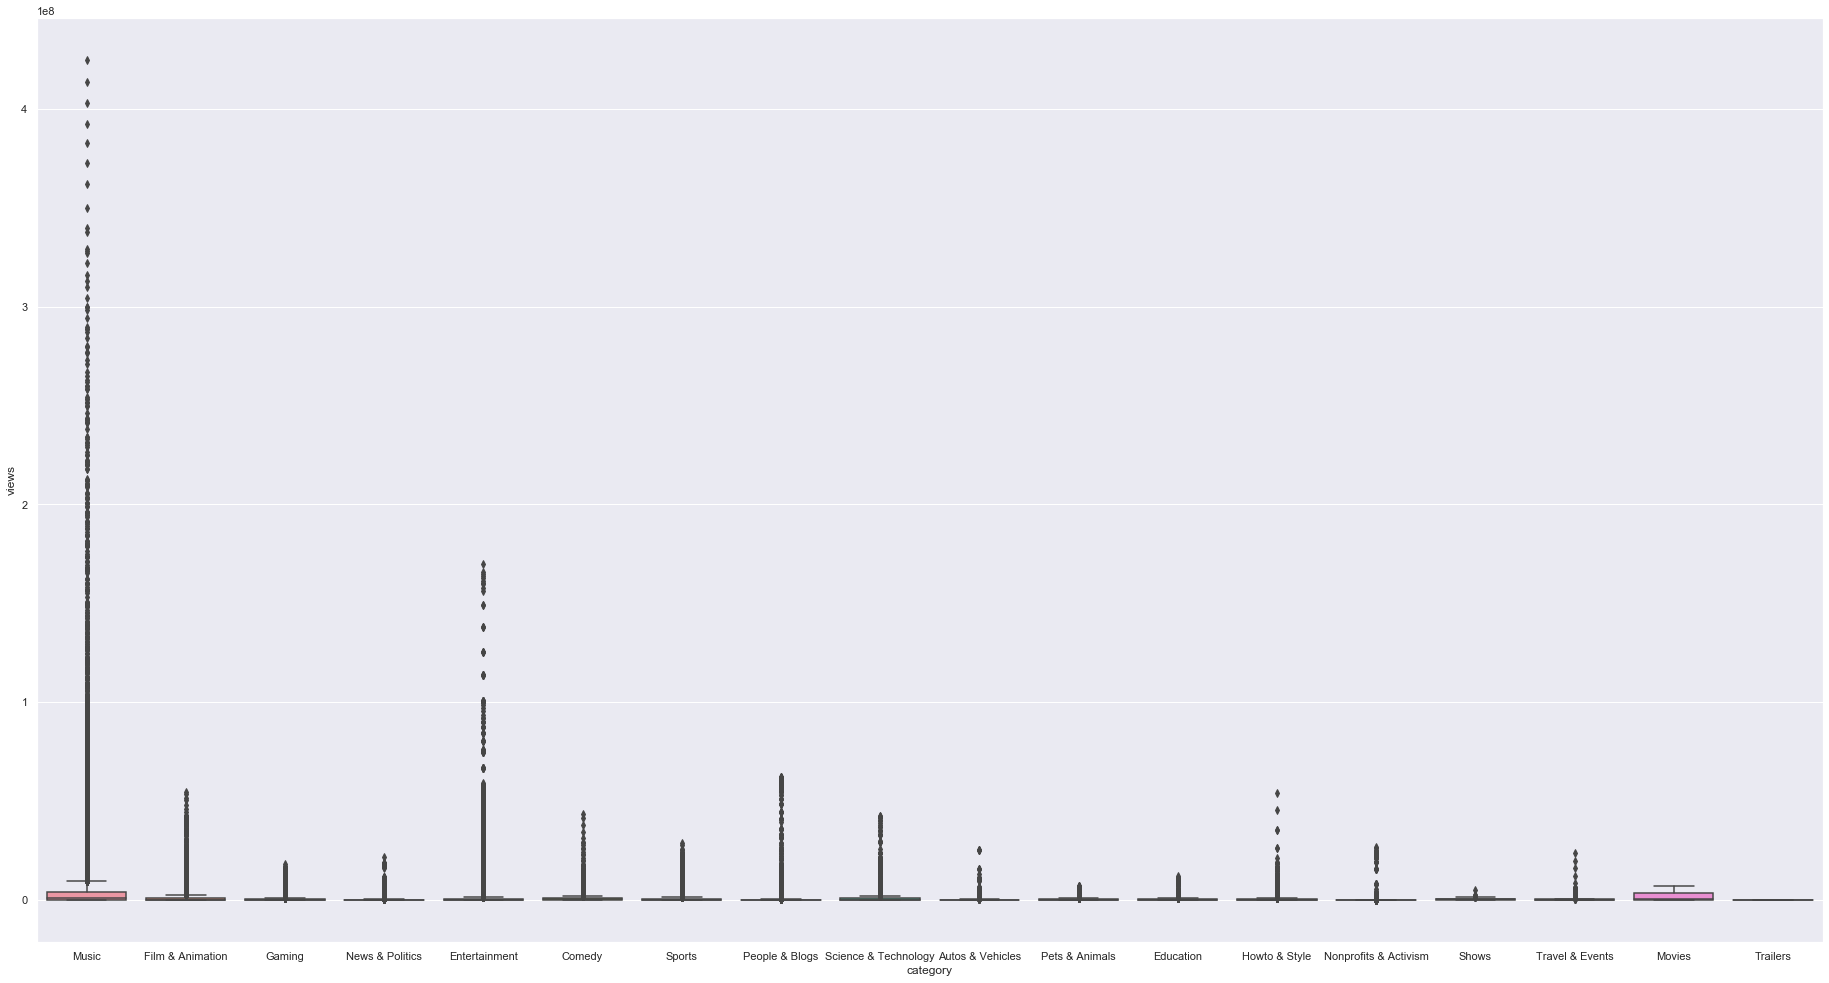

In [89]:
sns.set(rc={'figure.figsize':(32,17)})
ax = sns.boxplot(x="category", y="views", data=df_all_timestamps)

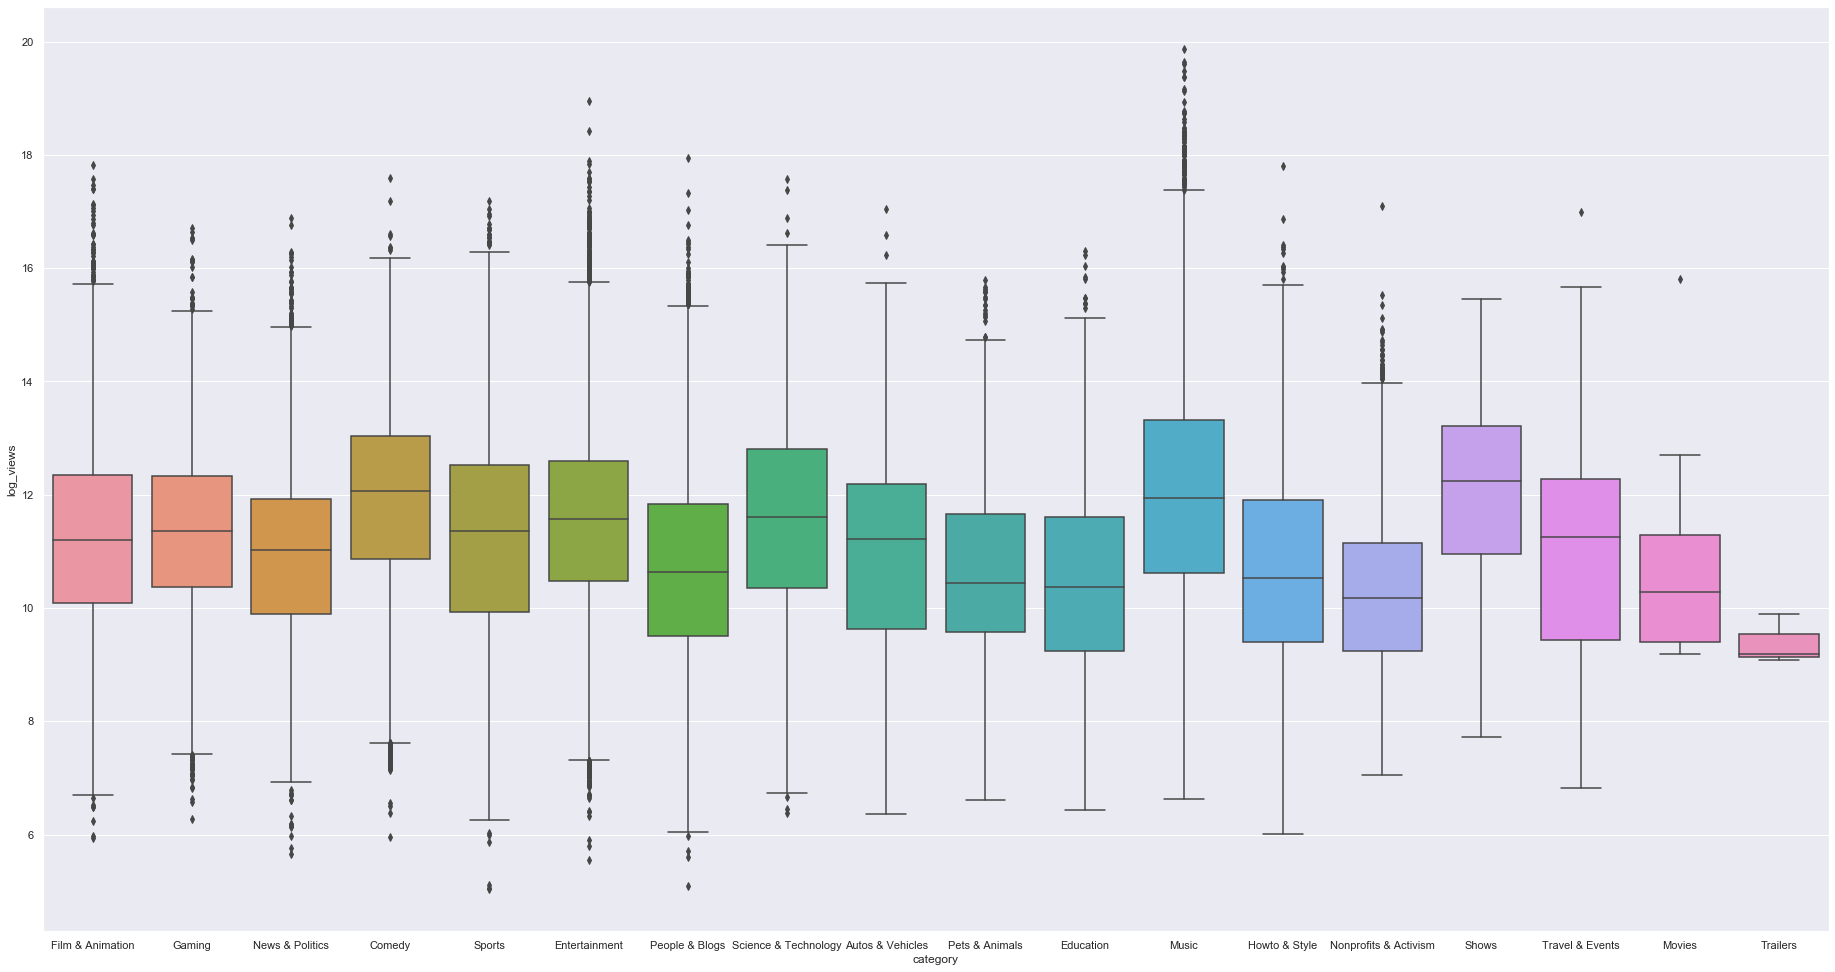

In [91]:
sns.set(rc={'figure.figsize':(32,17)})
ax = sns.boxplot(x="category", y="log_views", data=df)

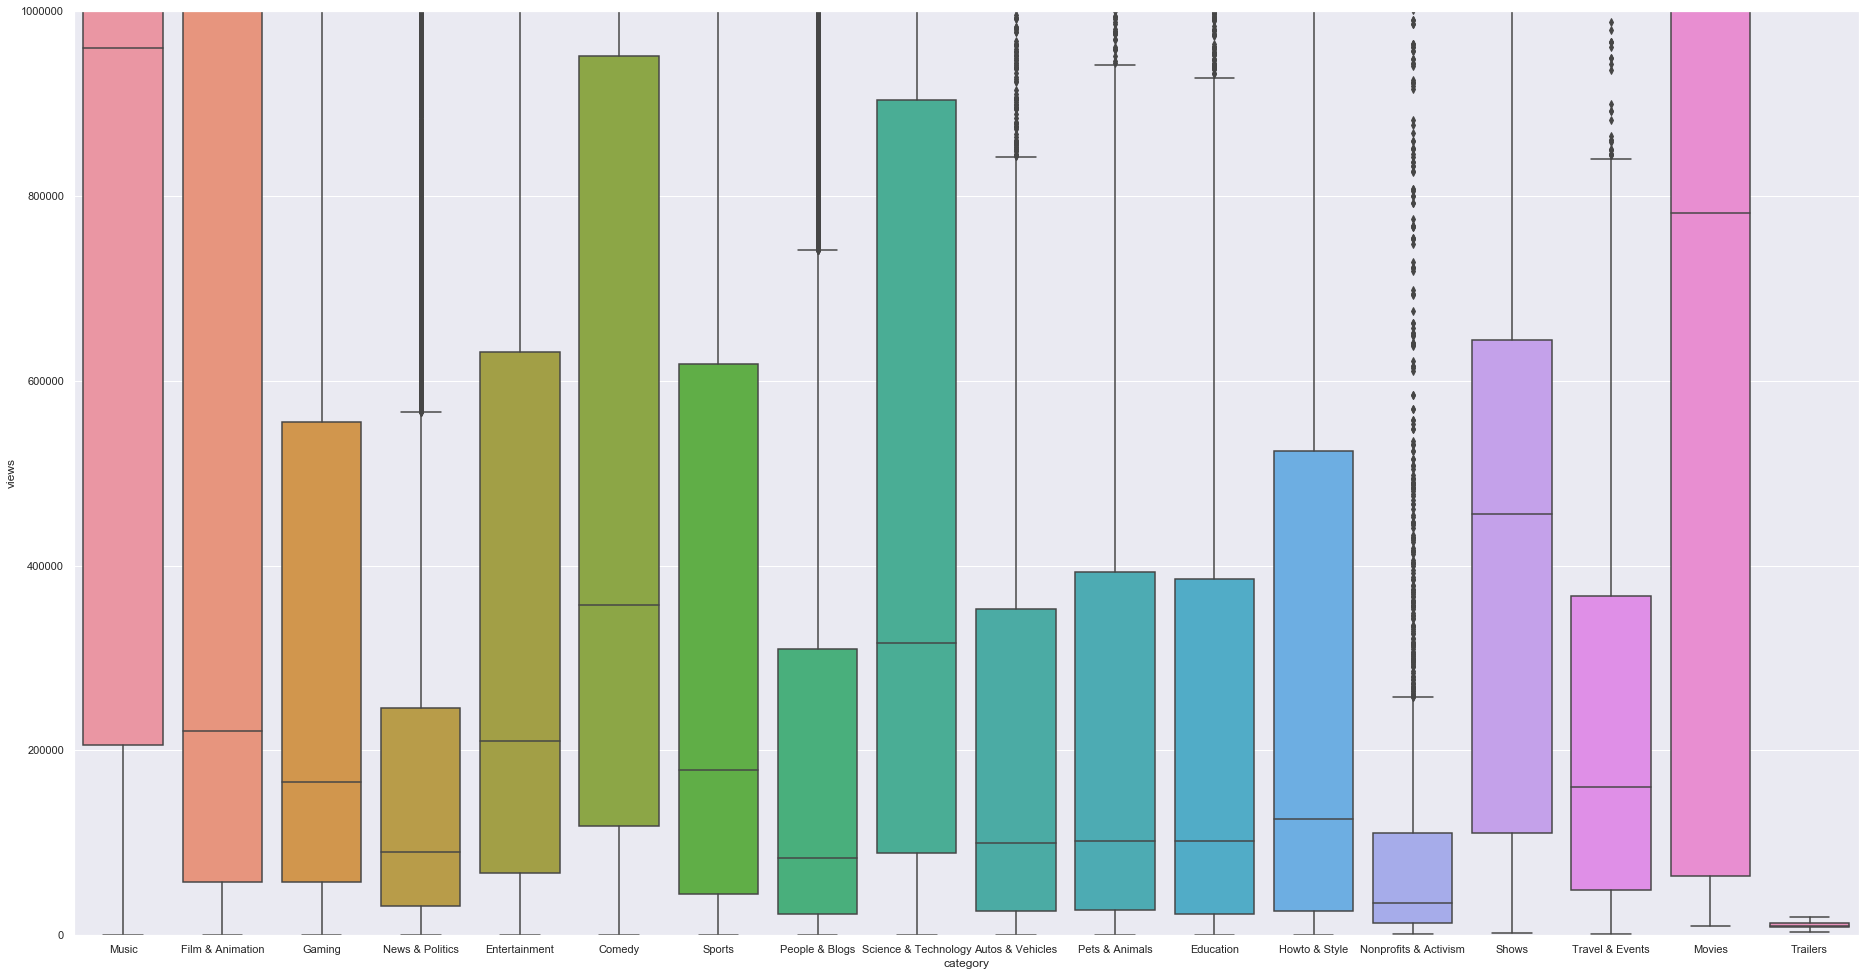

In [50]:
plt.ylim(0, 1000000)
sns.set(rc={'figure.figsize':(32,17)})
ax = sns.boxplot(x="category", y="views", data=df_all_timestamps)

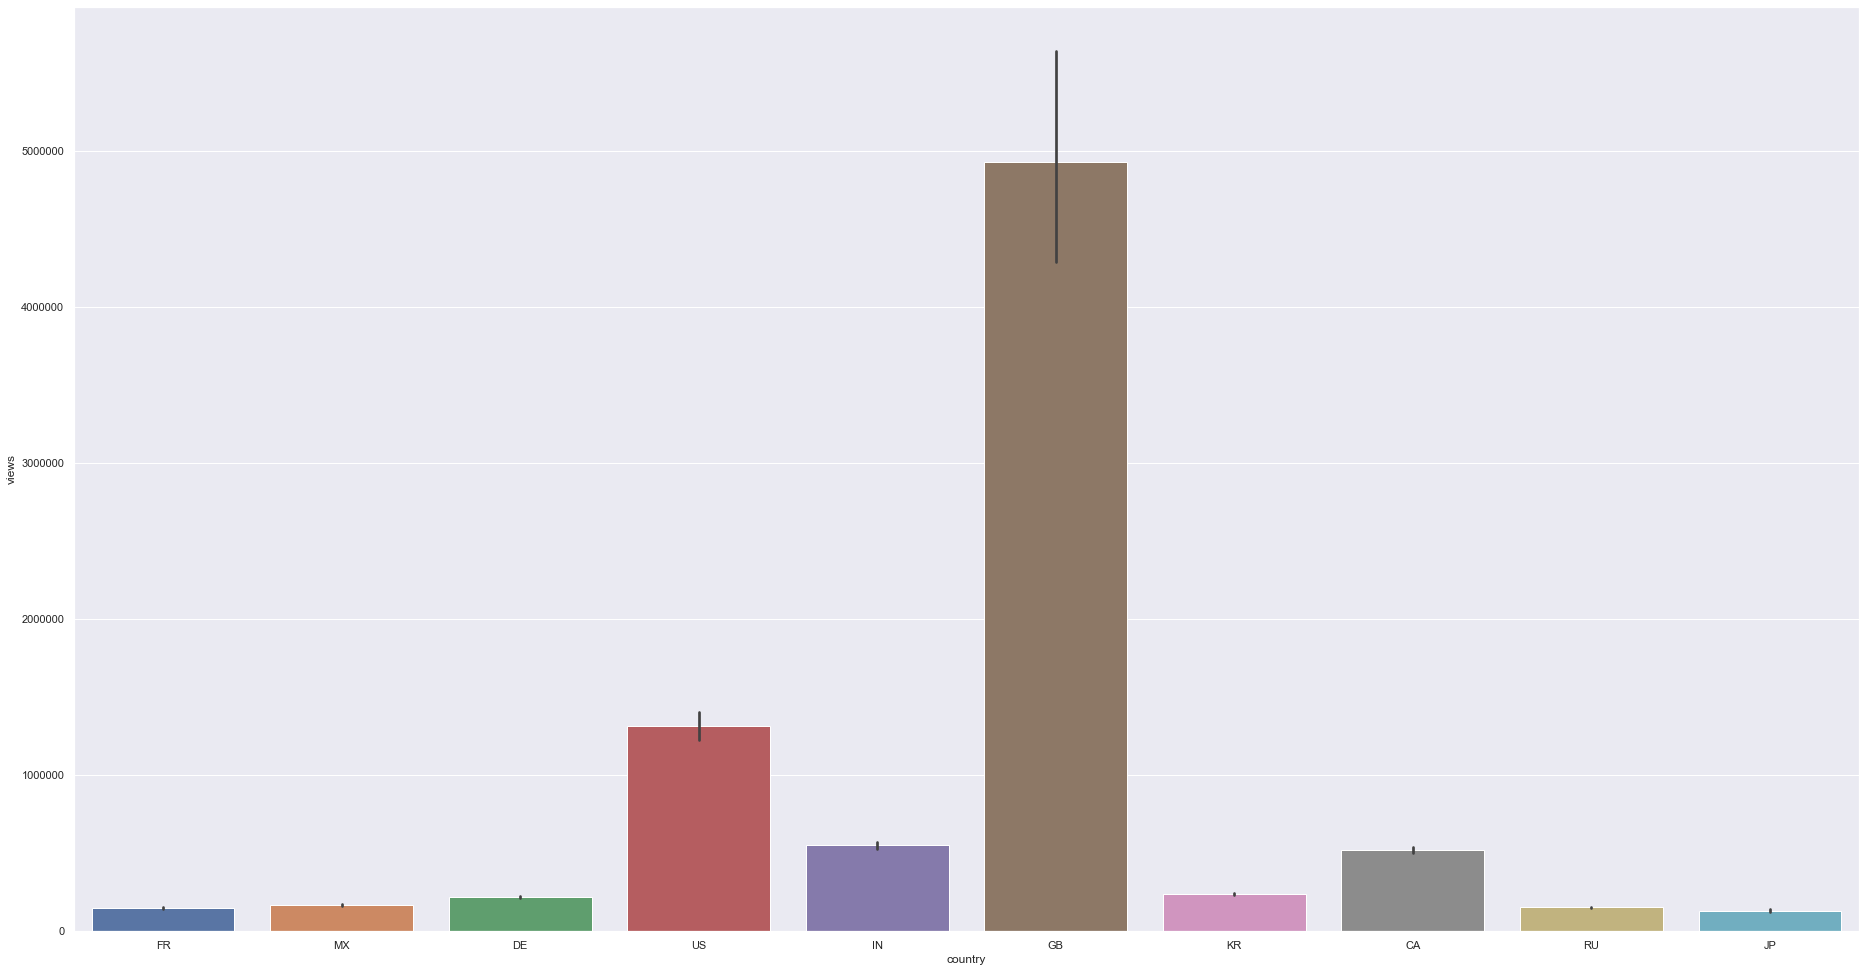

In [53]:
ax = sns.barplot(x="country", y="views", data=df)

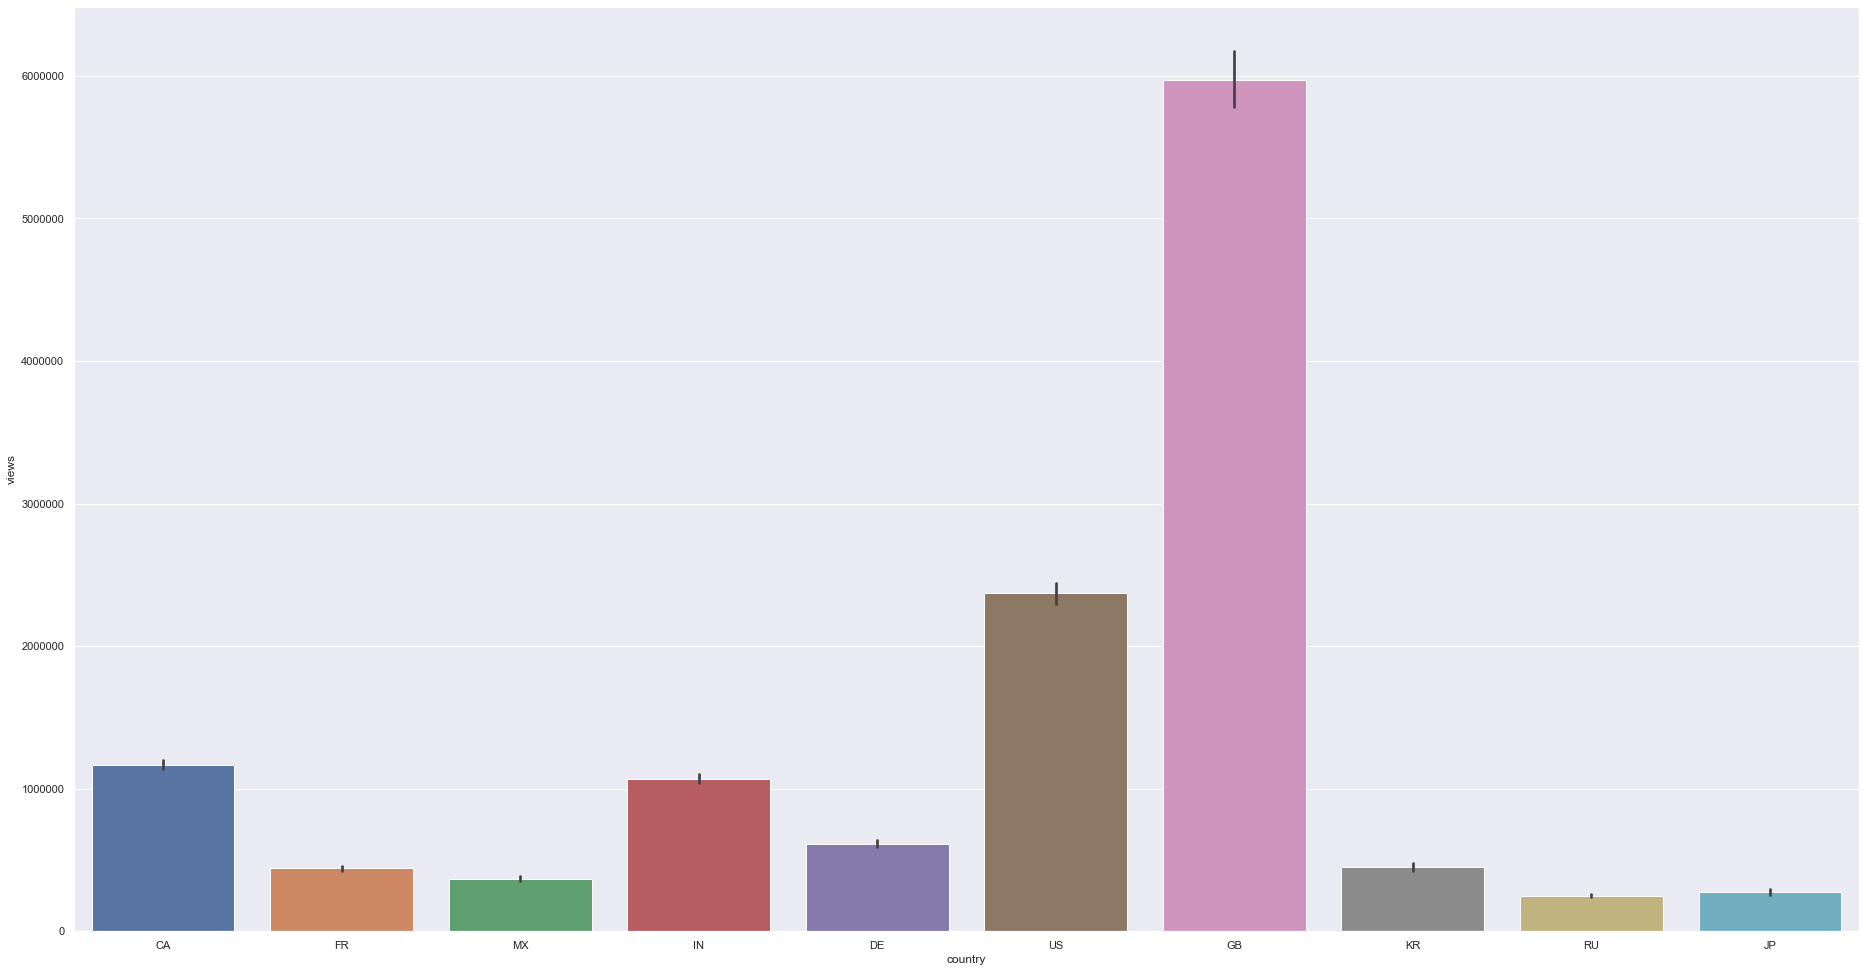

In [55]:
ax = sns.barplot(x="country", y="views", data= df_all_timestamps)

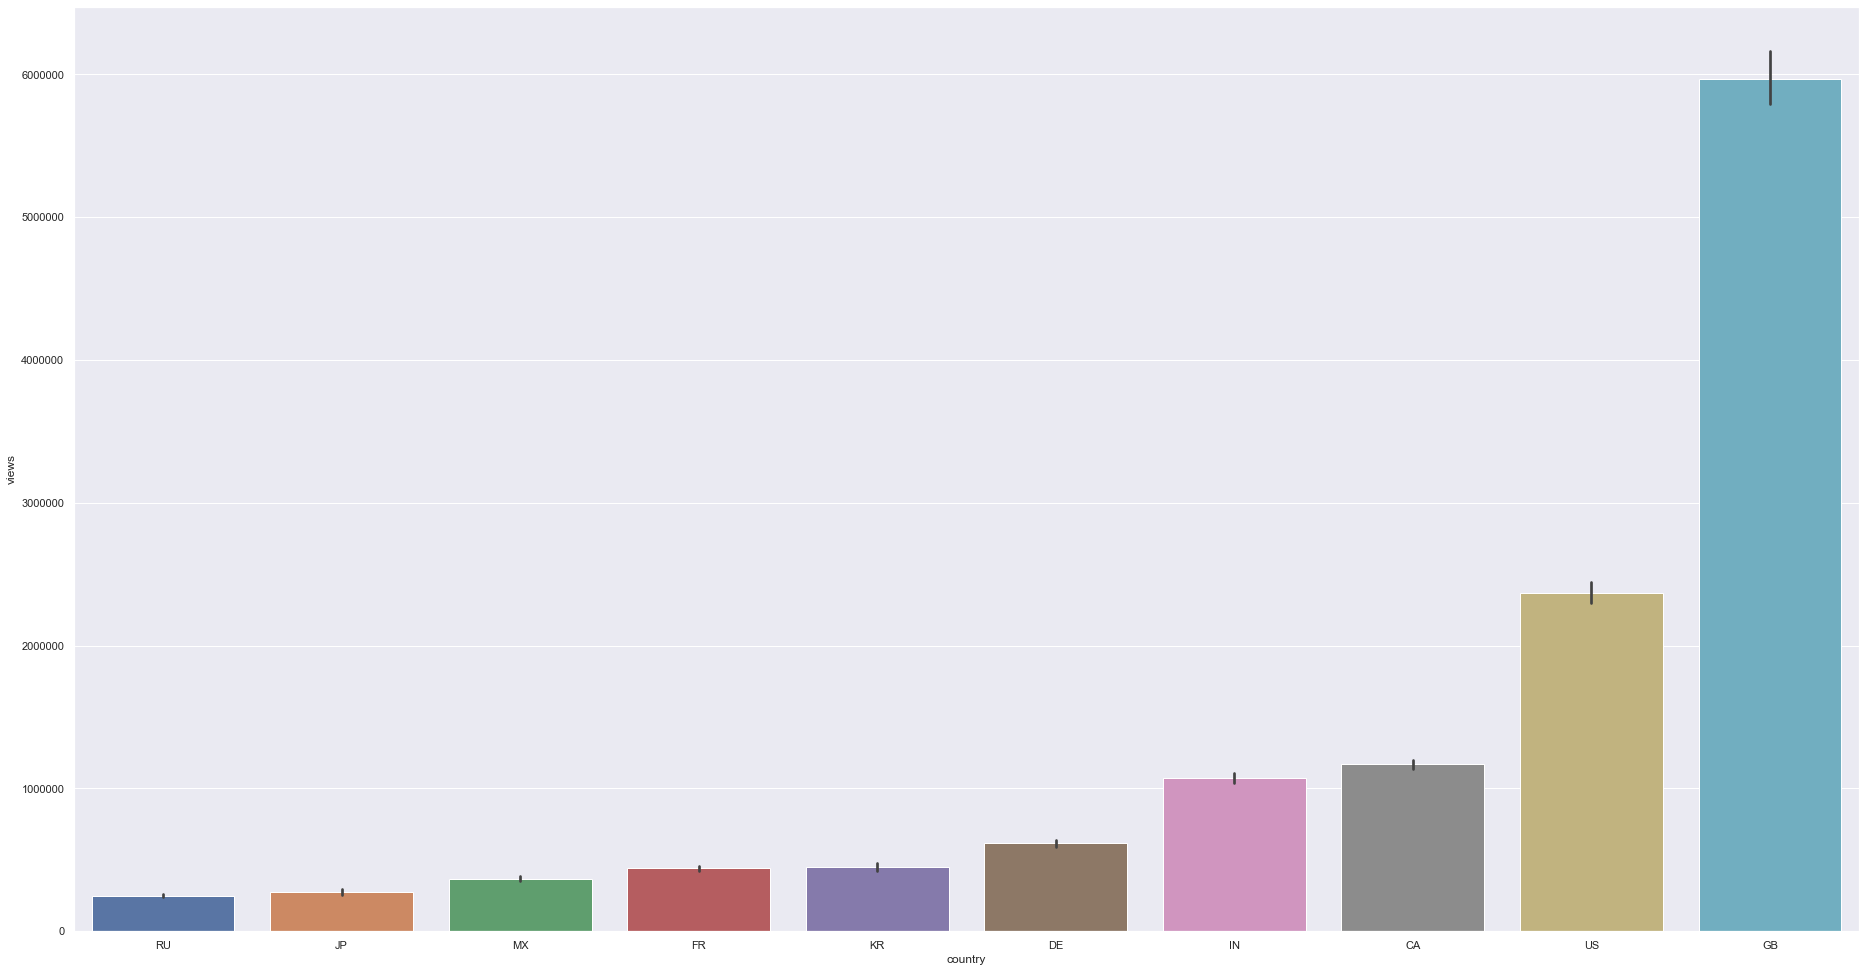

In [57]:
ax = sns.barplot(x="country", y="views", data= df_all_timestamps, 
order=["RU","JP","MX","FR","KR","DE","IN","CA","US","GB"])

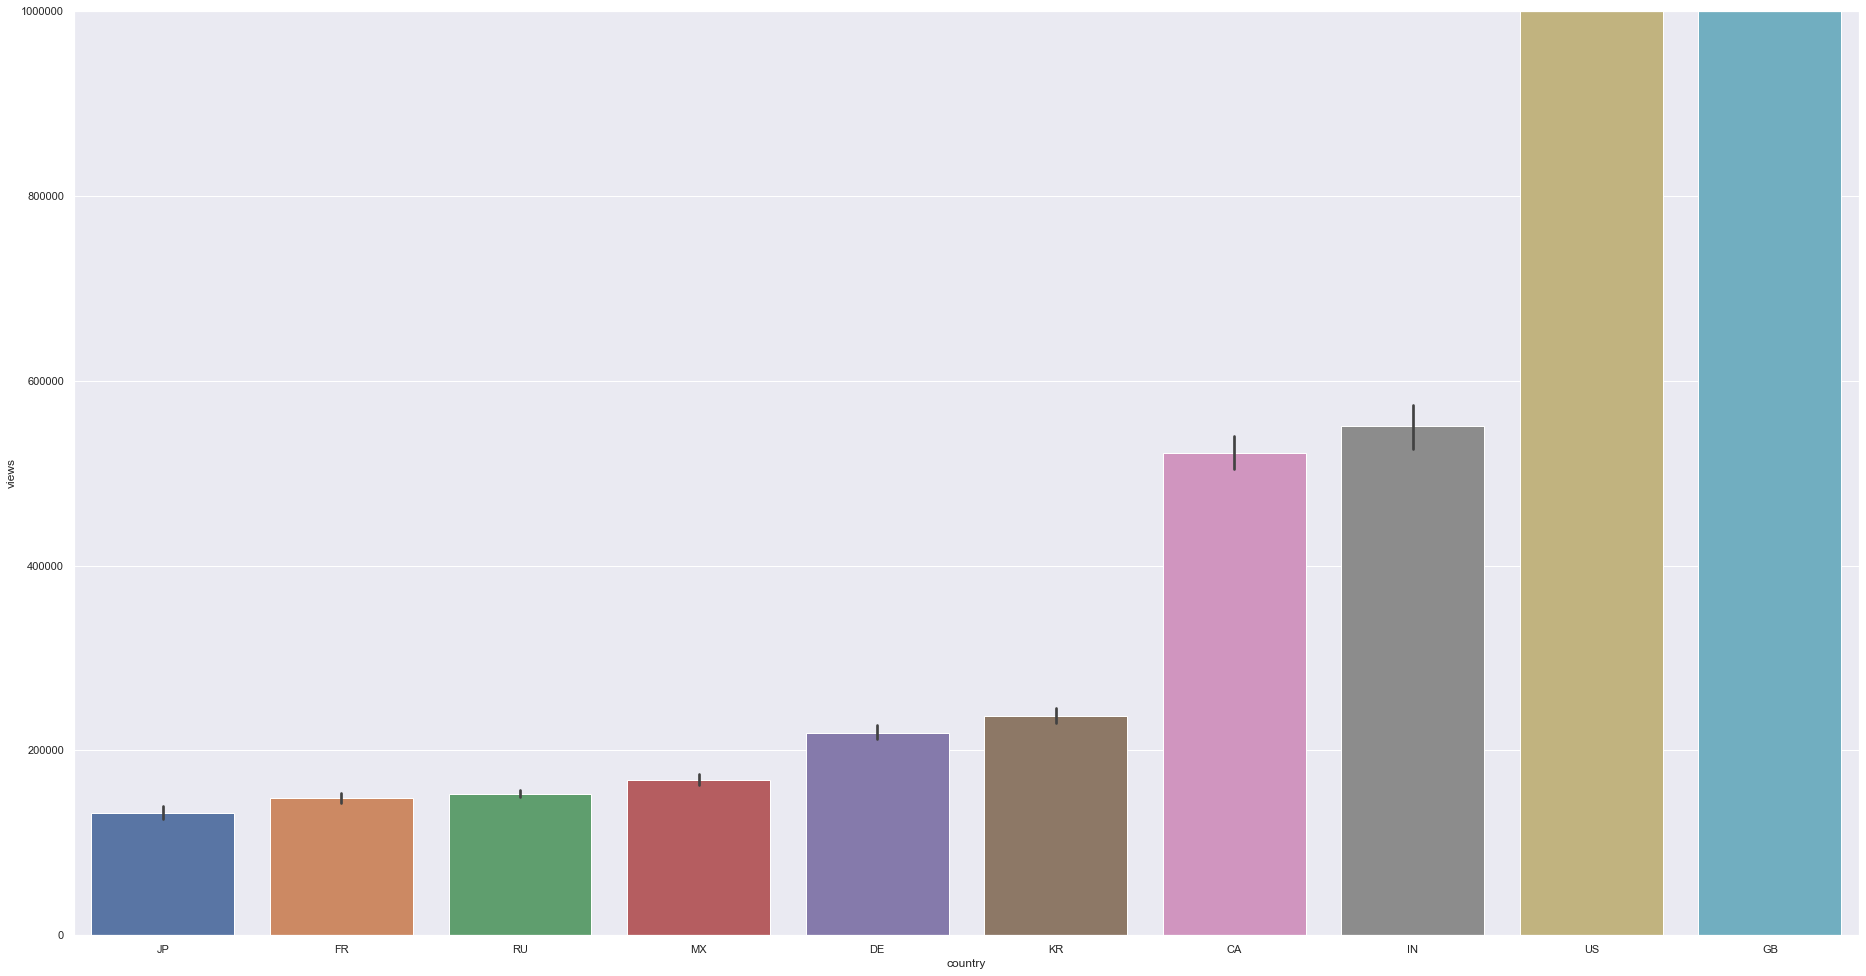

In [62]:
plt.ylim(0, 1000000)
ax = sns.barplot(x="country", y="views", data=df, order=["JP","FR","RU","MX","DE","KR","CA","IN","US","GB"])

In [ ]:
sns.set_palette("colorblind") 
ax = sns.barplot(x="country", y="views", data=df, order=["JP","FR","RU","MX","DE","KR","CA","IN","US","GB"])

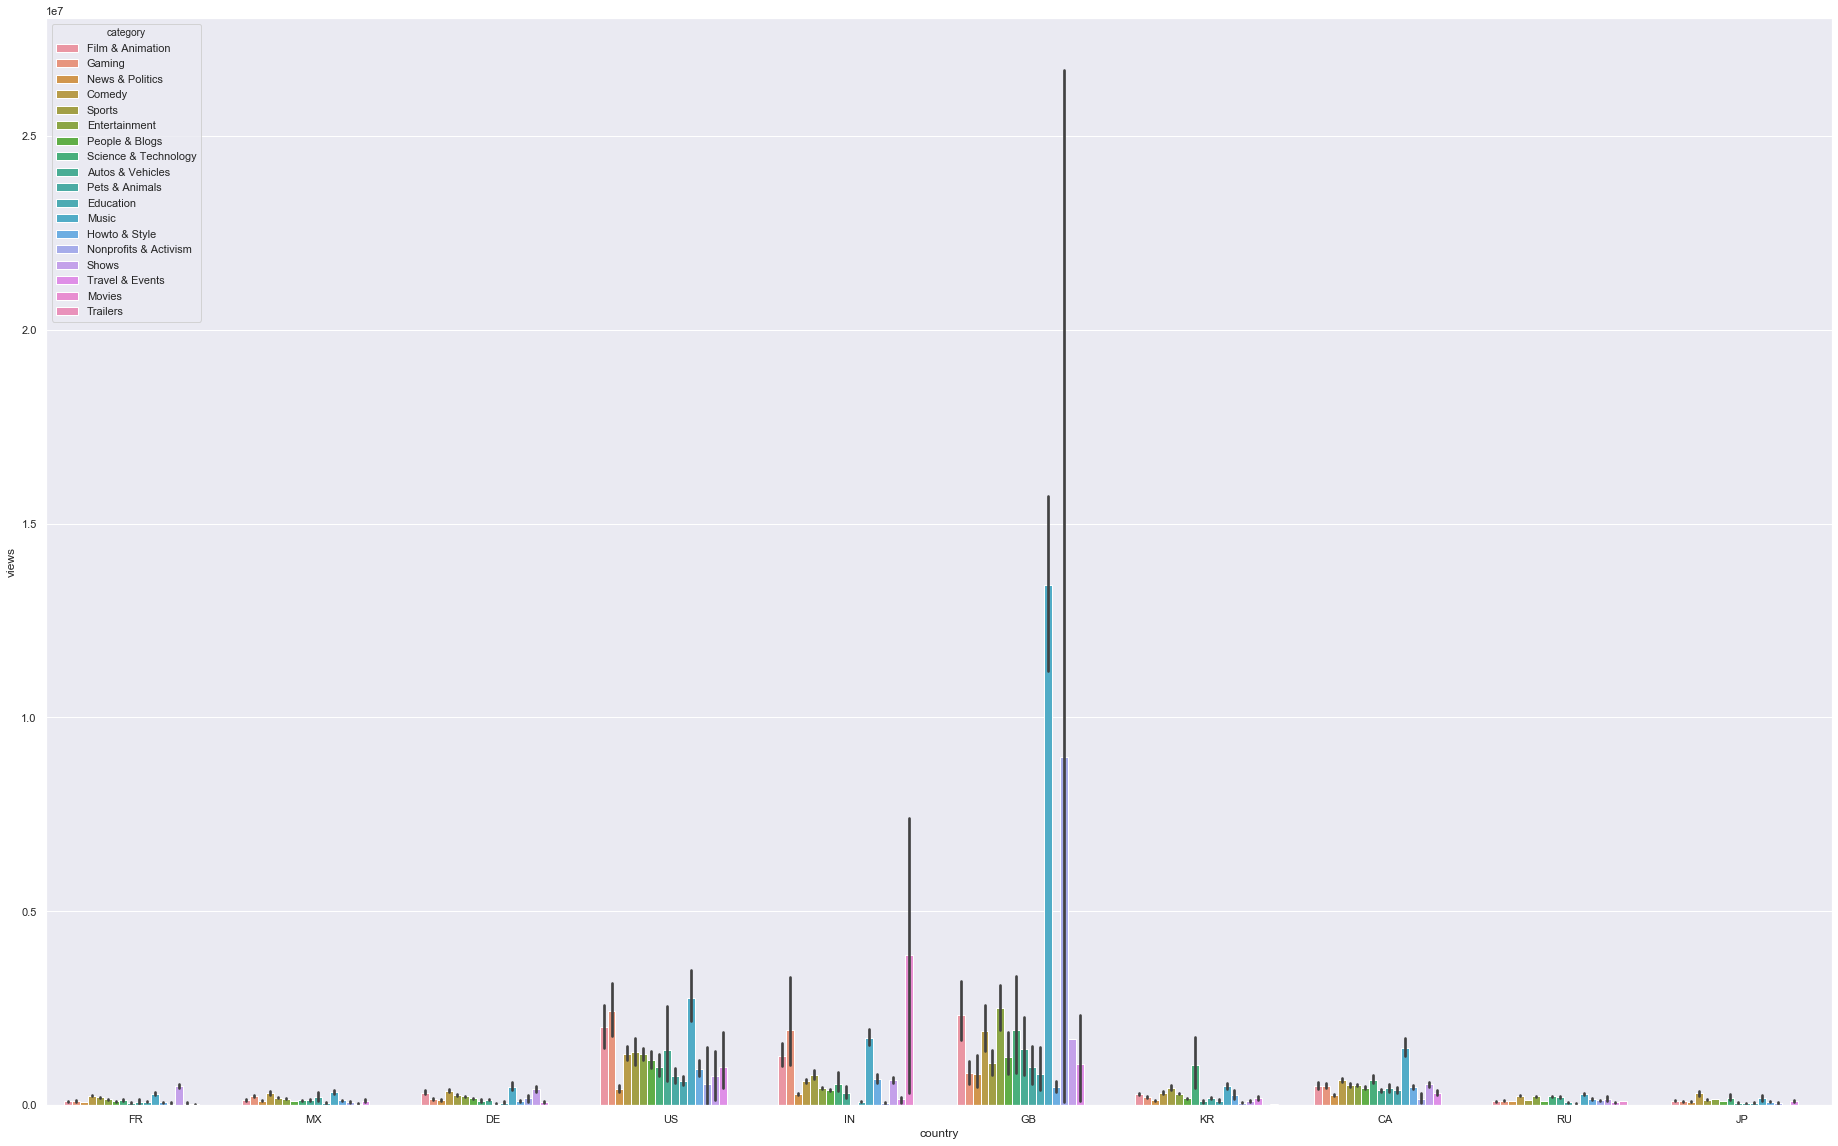

In [93]:
sns.set(rc={'figure.figsize':(32,20)})
ax = sns.barplot(x="country", y="views", hue="category", data=df)

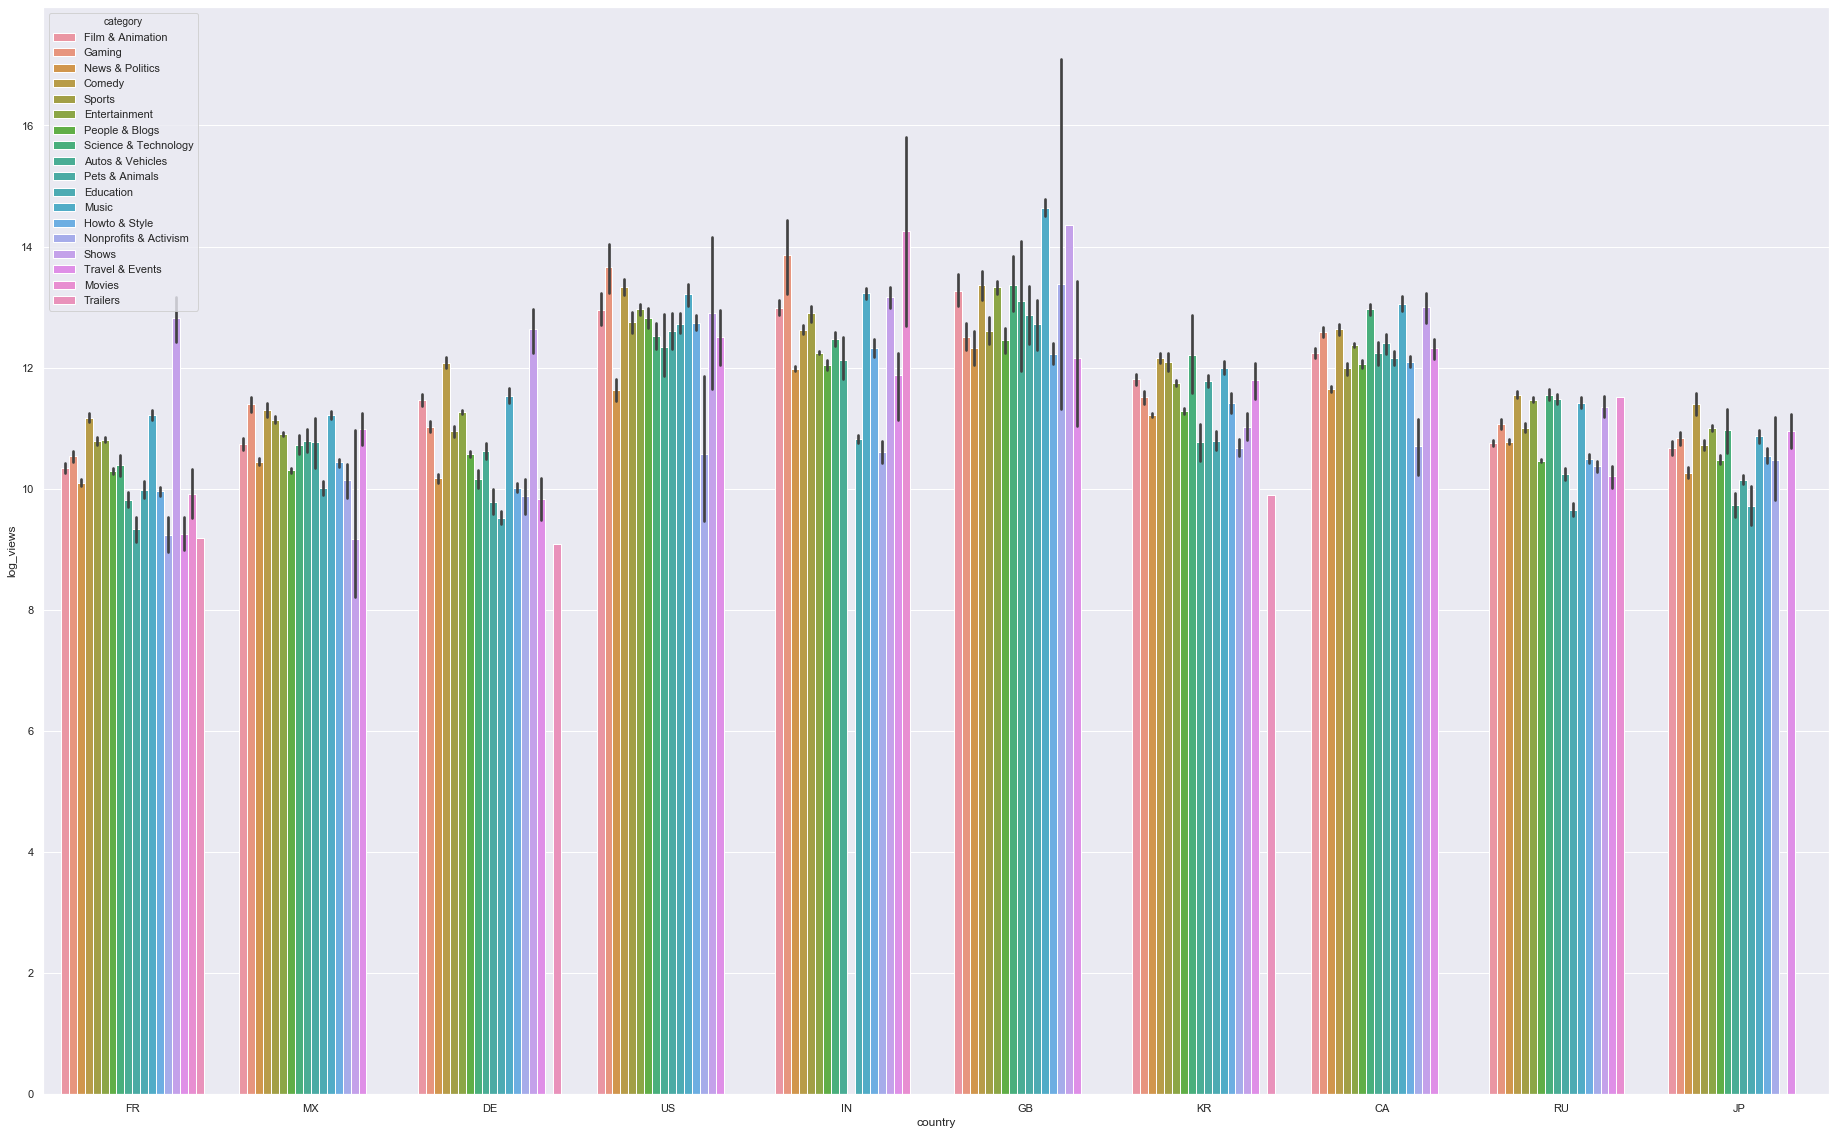

In [97]:
sns.barplot( x=df["country"], y=df["log_views"], hue=df["category"])
# ax = sns.barplot(x="country", y="views", hue="category", data=df, order=["GB"])

KeyboardInterrupt: 

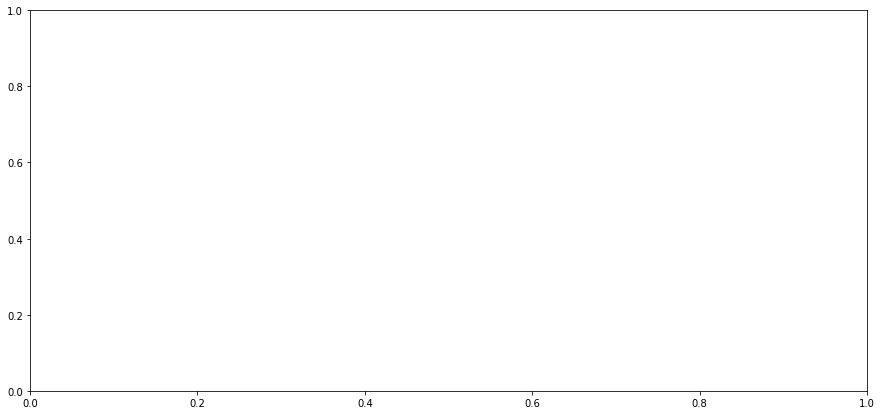

In [9]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['country','log_views']).count()['category'].unstack().plot(ax=ax)

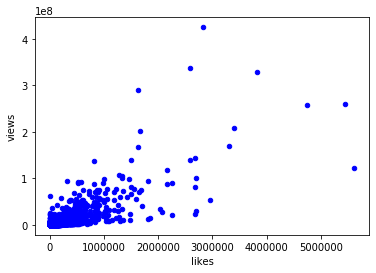

In [12]:
df.plot(x='likes',y='views',kind='scatter',color='Blue')

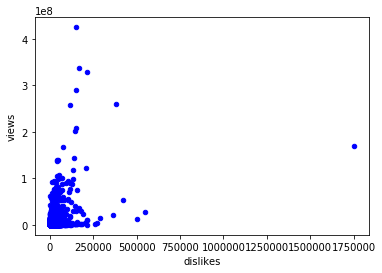

In [13]:
df.plot(x='dislikes',y='views',kind='scatter',color='Blue')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 23 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

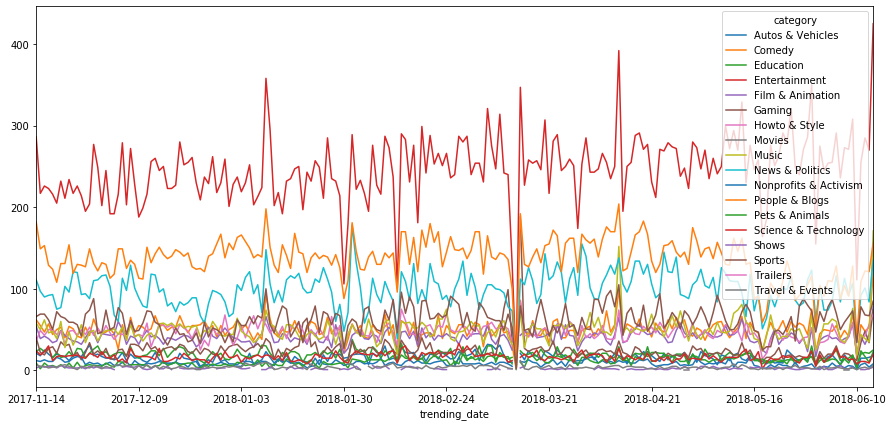

In [20]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['trending_date','category']).count()['views'].unstack().plot(ax=ax)

In [45]:
df.groupby(['category']).groups.keys()

dict_keys(['Autos & Vehicles', 'Comedy', 'Education', 'Entertainment', 'Film & Animation', 'Gaming', 'Howto & Style', 'Movies', 'Music', 'News & Politics', 'Nonprofits & Activism', 'People & Blogs', 'Pets & Animals', 'Science & Technology', 'Shows', 'Sports', 'Trailers', 'Travel & Events'])

In [84]:
# df[df.category = 'Entertainment', 'Comedy' or 'People & Blogs', 'News & Politics', 'Sports']

# len(df.groupby(['category']).groups['Autos & Vehicles'])      # 3274
# len(df.groupby(['category']).groups['Comedy'])                # 10358
# len(df.groupby(['category']).groups['Education'])             # 3897
# len(df.groupby(['category']).groups['Entertainment'])         # 50468
# len(df.groupby(['category']).groups['Film & Animation'])      # 8460
# len(df.groupby(['category']).groups['Gaming']) #5318     
# len(df.groupby(['category']).groups['Howto & Style'])         # 9580
# len(df.groupby(['category']).groups['Movies'])                # 12
# len(df.groupby(['category']).groups['Music'])                 # 10145
# len(df.groupby(['category']).groups['News & Politics'])       # 20327
# len(df.groupby(['category']).groups['Nonprofits & Activism']) # 1779
# len(df.groupby(['category']).groups['People & Blogs'])        # 28045    
# len(df.groupby(['category']).groups['Pets & Animals'])        # 2271                                 
# len(df.groupby(['category']).groups['Science & Technology'])  # 3404
# len(df.groupby(['category']).groups['Shows'])                 # 435
# len(df.groupby(['category']).groups['Sports'])                # 12561   
# len(df.groupby(['category']).groups['Trailers'])              # 3
# len(df.groupby(['category']).groups['Travel & Events'])       # 812
# all together add up to the keys, nothing broken or no duplicates

len(df.category.keys()) # 171149

171149

In [ ]:
len(df.groupby(['category']).groups['Comedy'])

In [ ]:
len(df.groupby(['category']).groups['Education'])

In [44]:
small_cat_view = df[["category_id", "category", "views", "country", "trending_date", "publish_date"]]
small_cat_view.head()

,category_id,category,views,country,trending_date,publish_date
0,1,Film & Animation,19487,FR,2017-11-14,2017-11-12
1,20,Gaming,20744,FR,2017-11-14,2017-11-12
2,25,News & Politics,207452,FR,2017-11-14,2017-11-12
3,1,Film & Animation,15899,FR,2017-11-14,2017-11-13
4,23,Comedy,100607,FR,2017-11-14,2017-11-13


In [41]:
#MAKE THIS GRAPH ONLY WITH LESS CATEGORIES

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['trending_date','category']).count()['views'].unstack().plot(ax=ax)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,9.877554,7.375882,3.178054,5.375278
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,9.940061,6.940222,6.326149,5.497168
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,12.242660,7.255591,5.003946,4.510860
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,9.674074,4.962845,2.397895,2.079442
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,11.518987,7.056175,3.891820,3.583519


In [ ]:
# df[df.category = 'Entertainment', 'Comedy' or 'People & Blogs', 'News & Politics', 'Sports']

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['trending_date','category']).count()['views'].unstack().plot(ax=ax)